# Exercise 2.1: Accessing Protein Interaction Data
There exist many different protein interaction databases that store information
about the pairwise interaction between protein. For this project, we use the Biological General Repository for Interaction Datasets (BIOGRID; see [1]). It is available under https://thebiogrid.org/.

BIOGRID stores information about experimentally measured pairwise interactions
between proteins in  80 different species.

## 2.1.1 Downloading Protein Interaction Data
Download the file BIOGRID-ORGANISM-4.4.205.tab3.zip from the database
and unpack the zip file. You now have 79 files, each contains the protein interaction information of a different organism. Sort the files by size; which organisms have the most interaction data available?

We download the file from https://downloads.thebiogrid.org/File/BioGRID/Release-Archive/BIOGRID-4.4.205/BIOGRID-ORGANISM-4.4.205.tab3.zip.

This file is uploaded to Google drive in the directory `Project10`. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp drive/My\ Drive/Project10/BIOGRID-ORGANISM-4.4.205.tab3.zip BIOGRID-ORGANISM-4.4.205.tab3.zip 

Now we unzip the file. 

In [ ]:
!unzip BIOGRID-ORGANISM-4.4.205.tab3.zip 

Archive:  BIOGRID-ORGANISM-4.4.205.tab3.zip
  inflating: BIOGRID-ORGANISM-Anas_platyrhynchos-4.4.205.tab3.txt  
  inflating: BIOGRID-ORGANISM-Anopheles_gambiae_PEST-4.4.205.tab3.txt  
  inflating: BIOGRID-ORGANISM-Apis_mellifera-4.4.205.tab3.txt  
  inflating: BIOGRID-ORGANISM-Arabidopsis_thaliana_Columbia-4.4.205.tab3.txt  
  inflating: BIOGRID-ORGANISM-Bacillus_subtilis_168-4.4.205.tab3.txt  
  inflating: BIOGRID-ORGANISM-Bos_taurus-4.4.205.tab3.txt  
  inflating: BIOGRID-ORGANISM-Caenorhabditis_elegans-4.4.205.tab3.txt  
  inflating: BIOGRID-ORGANISM-Candida_albicans_SC5314-4.4.205.tab3.txt  
  inflating: BIOGRID-ORGANISM-Canis_familiaris-4.4.205.tab3.txt  
  inflating: BIOGRID-ORGANISM-Cavia_porcellus-4.4.205.tab3.txt  
  inflating: BIOGRID-ORGANISM-Chlamydomonas_reinhardtii-4.4.205.tab3.txt  
  inflating: BIOGRID-ORGANISM-Chlorocebus_sabaeus-4.4.205.tab3.txt  
  inflating: BIOGRID-ORGANISM-Cricetulus_griseus-4.4.205.tab3.txt  
  inflating: BIOGRID-ORGANISM-Danio_rerio-4.4.205.tab3

In [ ]:
!ls | grep 'BIOGRID-ORGANISM.*\.tab3\.txt' | wc -l

81


We have 81 files. Now we take a look at the 10 biggest files.

In [ ]:
! ls -lSh | head 

total 1.4G
-rw-rw-r-- 1 root root 523M Dec 29 14:44 BIOGRID-ORGANISM-Homo_sapiens-4.4.205.tab3.txt
-rw-rw-r-- 1 root root 428M Dec 29 14:27 BIOGRID-ORGANISM-Saccharomyces_cerevisiae_S288c-4.4.205.tab3.txt
-rw------- 1 root root 143M Jan 14 14:54 BIOGRID-ORGANISM-4.4.205.tab3.zip
-rw-rw-r-- 1 root root  93M Dec 29 14:22 BIOGRID-ORGANISM-Escherichia_coli_K12_W3110-4.4.205.tab3.txt
-rw-rw-r-- 1 root root  47M Dec 29 14:20 BIOGRID-ORGANISM-Schizosaccharomyces_pombe_972h-4.4.205.tab3.txt
-rw-rw-r-- 1 root root  40M Dec 29 15:00 BIOGRID-ORGANISM-Arabidopsis_thaliana_Columbia-4.4.205.tab3.txt
-rw-rw-r-- 1 root root  39M Dec 29 14:17 BIOGRID-ORGANISM-Drosophila_melanogaster-4.4.205.tab3.txt
-rw-rw-r-- 1 root root  32M Dec 29 14:40 BIOGRID-ORGANISM-Mus_musculus-4.4.205.tab3.txt
-rw-rw-r-- 1 root root  18M Dec 29 14:19 BIOGRID-ORGANISM-Severe_acute_respiratory_syndrome_coronavirus_2-4.4.205.tab3.txt


The biggest file is `BIOGRID-ORGANISM-Homo_sapiens-4.4.205.tab3.txt`. 

## Subexercise 2.1.2 Investigate Protein Interaction Data
Before we create a program that reads these files to create a PPIN, we want to
investigate the files and their structure. The files are in a tab-separated format, which is very common for data files. It is basically a large table with the first line as header that gives a brief description about the contents contained in each column. Each of the following lines contains one entry, i.e., an interaction between two proteins. Each field value of an entry is separated from the next by a tab character. Open the file `BIOGRID-ORGANISM-Human_Herpesvirus_6B-4.4.205.tab3.txt` with OpenOffice Calc and with a Text Editor.

**Question: How many interactions are in this file?**

Each of these files contains a lot of information on the interactions. Most of these informations are not important for our project. Have a look at the description of this file format under https://wiki.thebiogrid.org/doku.php/biogrid_tab_version_3.0. 

**Question: The information of which columns are necessary to create a PPIN?There are different choices possible. Read the column definitions to
identify which columns are best suited.**

Have a look at one of the larger files. Is it still feasible to open them in OpenOffice Calc or with a Text Editor?

In [ ]:
import pandas as pd

In [ ]:
pd.read_csv("BIOGRID-ORGANISM-Human_Herpesvirus_6B-4.4.205.tab3.txt", sep ="\t")

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,Synonyms Interactor B,Experimental System,Experimental System Type,Author,Publication Source,Organism ID Interactor A,Organism ID Interactor B,Throughput,Score,Modification,Qualifications,Tags,Source Database,SWISS-PROT Accessions Interactor A,TREMBL Accessions Interactor A,REFSEQ Accessions Interactor A,SWISS-PROT Accessions Interactor B,TREMBL Accessions Interactor B,REFSEQ Accessions Interactor B,Ontology Term IDs,Ontology Term Names,Ontology Term Categories,Ontology Term Qualifier IDs,Ontology Term Qualifier Names,Ontology Term Types,Organism Name Interactor A,Organism Name Interactor B
0,692396,1497091,7329,1678317,113177,HhV6Bgp095,LA16c-358B7.1,U95,UBE2I,-,C358B7.1|P18|UBC9,Two-hybrid,physical,Tomoiu A (2006),PUBMED:17005699,32604,9606,Low Throughput,-,-,-,-,BIOGRID,Q9QJ12,-,NP_050270,P63279,B0QYN7|A8K503,NP_003336|NP_919236|NP_919237|NP_919235,-,-,-,-,-,-,Human Herpesvirus 6B,Homo sapiens
1,734278,1497087,7341,1678313,113188,HhV6Bgp091,OK/SW-cl.43,U90,SUMO1,-,DAP1|GMP1|OFC10|PIC1|SENP2|SMT3|SMT3C|SMT3H3|UBL1,Affinity Capture-Western,physical,Gravel A (2002),PUBMED:11901159,32604,9606,Low Throughput,-,-,-,-,BIOGRID,Q77PU6,-,NP_050266,P63165,A0A024R3Z2,NP_001358323|NP_001358322|NP_001358321|NP_0010...,-,-,-,-,-,-,Human Herpesvirus 6B,Homo sapiens
2,2347266,1497013,7157,1678239,113010,HhV6Bgp020,-,U14,TP53,-,BCC7|LFS1|P53|TRP53,Affinity Capture-MS,physical,Mori J (2015),PUBMED:26340541,32604,9606,High Throughput,-,-,-,-,BIOGRID,Q9QJ49,-,NP_050195,P04637,H2EHT1|A0A087WT22|A0A087WXZ1|Q53GA5|A0A087X1Q1...,NP_001119586|NP_001119590|NP_001119584|NP_0005...,-,-,-,-,-,-,Human Herpesvirus 6B,Homo sapiens
3,2347267,1497013,51366,1678239,119501,HhV6Bgp020,-,U14,UBR5,-,DD5|EDD|EDD1|HYD,Affinity Capture-MS,physical,Mori J (2015),PUBMED:26340541,32604,9606,High Throughput,-,-,-,-,BIOGRID,Q9QJ49,-,NP_050195,O95071,E7EMW7,NP_056986|NP_001269802,-,-,-,-,-,-,Human Herpesvirus 6B,Homo sapiens


There are 4 interactions.

We only need IDs to uniquely identify the nodes. According to the website, the BioGRID ID Interactor A and	BioGRID ID Interactor B are best in this case.

In [ ]:
len(pd.read_csv('BIOGRID-ORGANISM-Severe_acute_respiratory_syndrome_coronavirus_2-4.4.205.tab3.txt', sep='\t'))

26457

The 10th biggest file has 26457 rows, therefore the bigger files are not feasible to open.

# Exercise 2.2 Construct PPINs from BIOGRID data
Now we will create PPINs from these files. First, we create a small PPIN manually to get an understanding of what our program is supposed to do. Second, we write a program that constructs a PPIN from a file.

## Subexercise 2.2.1 Create a PPIN manually
To get an understanding of what the program is supposed to do automated, we do
it first manually ourselves. Open the file `BIOGRID-ORGANISM-Human_Herpesvirus_6B-4.4.205.tab3.txt`. Draw a PPIN with pen and paper. 

**Question: How many nodes and edges are in this network? What is the size
of the largest connected component?**

In [ ]:
pd.read_csv('BIOGRID-ORGANISM-Human_Herpesvirus_6B-4.4.205.tab3.txt', sep='\t')

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,Synonyms Interactor B,Experimental System,Experimental System Type,Author,Publication Source,Organism ID Interactor A,Organism ID Interactor B,Throughput,Score,Modification,Qualifications,Tags,Source Database,SWISS-PROT Accessions Interactor A,TREMBL Accessions Interactor A,REFSEQ Accessions Interactor A,SWISS-PROT Accessions Interactor B,TREMBL Accessions Interactor B,REFSEQ Accessions Interactor B,Ontology Term IDs,Ontology Term Names,Ontology Term Categories,Ontology Term Qualifier IDs,Ontology Term Qualifier Names,Ontology Term Types,Organism Name Interactor A,Organism Name Interactor B
0,692396,1497091,7329,1678317,113177,HhV6Bgp095,LA16c-358B7.1,U95,UBE2I,-,C358B7.1|P18|UBC9,Two-hybrid,physical,Tomoiu A (2006),PUBMED:17005699,32604,9606,Low Throughput,-,-,-,-,BIOGRID,Q9QJ12,-,NP_050270,P63279,B0QYN7|A8K503,NP_003336|NP_919236|NP_919237|NP_919235,-,-,-,-,-,-,Human Herpesvirus 6B,Homo sapiens
1,734278,1497087,7341,1678313,113188,HhV6Bgp091,OK/SW-cl.43,U90,SUMO1,-,DAP1|GMP1|OFC10|PIC1|SENP2|SMT3|SMT3C|SMT3H3|UBL1,Affinity Capture-Western,physical,Gravel A (2002),PUBMED:11901159,32604,9606,Low Throughput,-,-,-,-,BIOGRID,Q77PU6,-,NP_050266,P63165,A0A024R3Z2,NP_001358323|NP_001358322|NP_001358321|NP_0010...,-,-,-,-,-,-,Human Herpesvirus 6B,Homo sapiens
2,2347266,1497013,7157,1678239,113010,HhV6Bgp020,-,U14,TP53,-,BCC7|LFS1|P53|TRP53,Affinity Capture-MS,physical,Mori J (2015),PUBMED:26340541,32604,9606,High Throughput,-,-,-,-,BIOGRID,Q9QJ49,-,NP_050195,P04637,H2EHT1|A0A087WT22|A0A087WXZ1|Q53GA5|A0A087X1Q1...,NP_001119586|NP_001119590|NP_001119584|NP_0005...,-,-,-,-,-,-,Human Herpesvirus 6B,Homo sapiens
3,2347267,1497013,51366,1678239,119501,HhV6Bgp020,-,U14,UBR5,-,DD5|EDD|EDD1|HYD,Affinity Capture-MS,physical,Mori J (2015),PUBMED:26340541,32604,9606,High Throughput,-,-,-,-,BIOGRID,Q9QJ49,-,NP_050195,O95071,E7EMW7,NP_056986|NP_001269802,-,-,-,-,-,-,Human Herpesvirus 6B,Homo sapiens


We drew a figure showing all interactions.
- 7 Nodes
- 4 edges
- size of largest component: 3 nodes, 2 edges


## Subexercise 2.2.2 Write a program to Construct PPINs from a BIOGRID file
Write a program that reads the file `BIOGRID-ORGANISM-Human_Herpesvirus_6B-4.4.205.tab3.txt` and creates a NETWORKX graph from it.

In [ ]:
import networkx as nx # For networks
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook")

In [ ]:
G_herpes = nx.from_pandas_edgelist(pd.read_csv('BIOGRID-ORGANISM-Human_Herpesvirus_6B-4.4.205.tab3.txt', sep='\t'),
                                   source='BioGRID ID Interactor A', target='BioGRID ID Interactor B')
print("Number of nodes:",G_herpes.number_of_nodes())
print("Number of edges:",G_herpes.number_of_edges())

Number of nodes: 7
Number of edges: 4


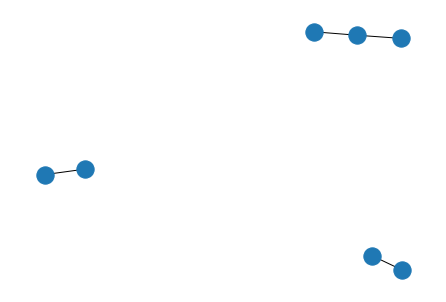

In [ ]:
nx.draw(G_herpes)

## Subexercise 2.2.3 Use NetworkX to Illustrate Graphs
Create a new program that draws the PPIN of Herpesvirus 6B by using NetworkX.

**Question: Is this network the same as the one you drew? If not, check for
errors**

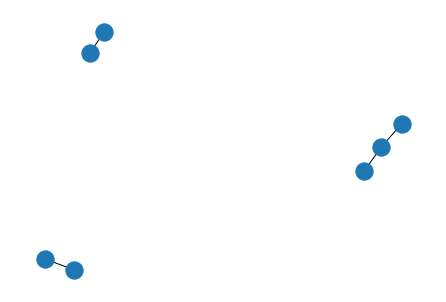

In [ ]:
G_herpes = nx.from_pandas_edgelist(pd.read_csv('BIOGRID-ORGANISM-Human_Herpesvirus_6B-4.4.205.tab3.txt', sep='\t'),
                                   source='BioGRID ID Interactor A', target='BioGRID ID Interactor B')
nx.draw(G_herpes)

The layout is different. This happens, because the default spring layout is not consistent in drawing.

## Subexercise 2.2.4 Create PPINs for other Organisms
Thus far, we wrote a program that constructs a PPIN for a single organism. Create a new version of your program that takes a file name as an input and so is able to create a PIN of any of the 79 organisms.

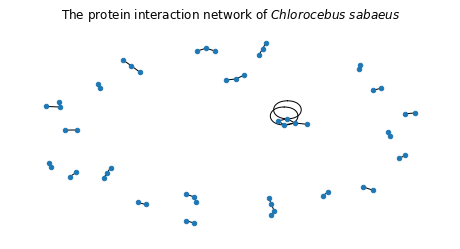

In [ ]:
inputname="BIOGRID-ORGANISM-Chlorocebus_sabaeus-4.4.205.tab3.txt"
G = nx.from_pandas_edgelist(pd.read_csv(inputname, sep='\t'),
                            source='BioGRID ID Interactor A', target='BioGRID ID Interactor B',
                            )
pos = nx.spring_layout(G, seed=3)
fig, ax = plt.subplots(figsize=(8, 4))
nx.draw_networkx_nodes(G, pos, ax=ax, node_size=20)
nx.draw_networkx_edges(G, pos, ax=ax)
ax.set_title("The protein interaction network of $\it{Chlorocebus\ sabaeus}$")
ax.set_axis_off()

If `inputname` is changed, the given file will be read and the graph is shown.
This example execution shows the network of _Chlorocebus sabaeus_.

##Subexercise 2.2.5 Cleaning PPINs
Adapt you program such that it removes parallel edges (multiple edges connecting
the same pair of nodes) and self-loops (edges connecting a node to itself)

We apply this to the graph from the task above.

In [ ]:
print("There are", nx.number_of_selfloops(G), "selfloops.")
G.remove_edges_from(nx.selfloop_edges(G))

There are 2 selfloops.


There are no parallel edges, since undirected Graphs don't have them according to the definition. `NetworkX´ does not allow them either (see: [Doc](https://networkx.org/documentation/stable/reference/classes/graph.html)).

Now we draw:

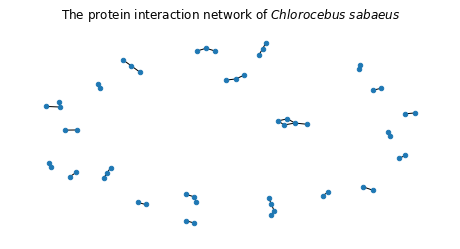

In [ ]:
pos = nx.spring_layout(G, seed=3)
fig, ax = plt.subplots(figsize=(8,4))
nx.draw_networkx_nodes(G, pos, ax=ax, node_size=20)
nx.draw_networkx_edges(G, pos, ax=ax)
ax.set_title("The protein interaction network of $\it{Chlorocebus\ sabaeus}$")
ax.set_axis_off()

# Exercise 2.3 Analysis of the human protein interaction network
After defining a function that constructs protein interaction networks from BI-
OGRID we will now analyse the network for Homo Sapiens. First, use your pro-
gramme to construct the PIN for Homo Sapiens.

In [ ]:
inputname="BIOGRID-ORGANISM-Homo_sapiens-4.4.205.tab3.txt"
G = nx.from_pandas_edgelist(pd.read_csv(inputname, sep='\t'),
                            source='BioGRID ID Interactor A', target='BioGRID ID Interactor B')
G.remove_edges_from(nx.selfloop_edges(G))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
print("Number of nodes:",G.number_of_nodes())
print("Number of edges:",G.number_of_edges())

Number of nodes: 27274
Number of edges: 732761


## Subexercise 2.3.1 Largest component
Identify the largest component and what percentage of nodes are in it. For the
remainder of this work, work only with the largest component.

In [ ]:
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])

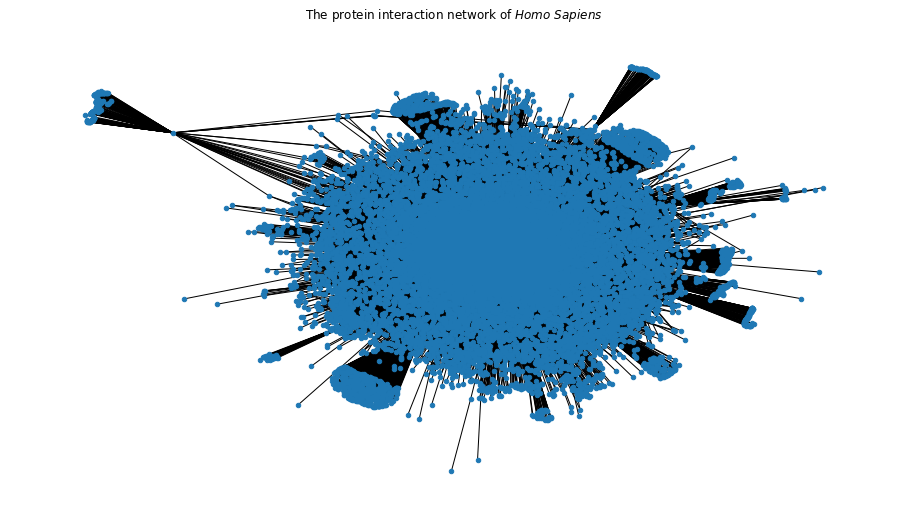

In [110]:
pos = nx.spring_layout(Gcc, seed=3)
fig, ax = plt.subplots(figsize=(16, 9))
nx.draw_networkx_nodes(Gcc, pos, ax=ax, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax)
ax.set_title("The protein interaction network of $\it{Homo\ Sapiens}$")
ax.set_axis_off()

In [ ]:
sizeWholeNetwork = G.number_of_nodes()
sizeLargestConnectedComponent = Gcc.number_of_nodes()

print('The size of the whole network is', sizeWholeNetwork)
print('The size of the largest connected component is', sizeLargestConnectedComponent)
print('Therefore, approximately', 100*sizeLargestConnectedComponent/sizeWholeNetwork, '% of all nodes are in the largest connected component.')

The size of the whole network is 27274
The size of the largest connected component is 27269
Therefore, approximately 99.98166752218229 % of all nodes are in the largest connected component.


In [ ]:
print("Number of nodes:",Gcc.number_of_nodes())
print("Number of edges:",Gcc.number_of_edges())

Number of nodes: 27269
Number of edges: 732760


## Subexercise 2.3.2 Degree distribution
Compute the mean degree and illustrate the degree distribution. Does the degree
distribution resemble the one of an Erdös–Rényi (ER) network?

In [ ]:
meanDegree = 2*Gcc.number_of_edges()/Gcc.number_of_nodes()
print('The mean degree of nodes is', meanDegree)

The mean degree of nodes is 53.74307822069016


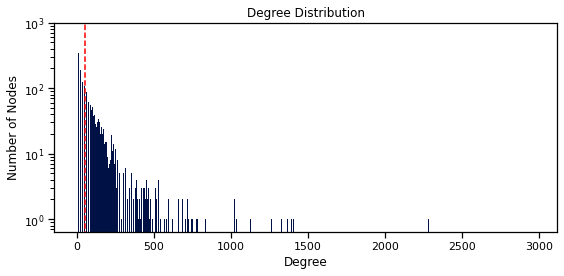

In [ ]:
degree_sequence = sorted([d for n, d in Gcc.degree()], reverse=True)
dmax = max(degree_sequence)

fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(*np.unique(degree_sequence, return_counts=True),color='#001146')
ax.set_title("Degree Distribution")
ax.set_xlabel("Degree")
ax.set_ylabel("Number of Nodes")
ax.set_yscale('log')
ax.vlines(meanDegree,0,10**4,linestyles='dashed',label='mean degree',color='r')
ax.set_ylim(top=10**3)

fig.tight_layout()

plt.show()

## Subexercise 2.3.3 Centrality measures
Identify the hubs in the network. For this, compute at least two different centrality measures. Give their proper definitions with references in the write-up. Discuss the top-ranked proteins for different centrality measures. Do you find the identical proteins with different measures? Illustrate the centralities of the proteins in a scatterplot and compute the correlation between the centralities. Discuss your findings.

We use the degree centrality and the eigenvector centrality to identify the hubs. (See: [Linktext](https://networkx.org/documentation/stable/reference/algorithms/centrality.html))

In [ ]:
centrality_df = pd.DataFrame(Gcc.nodes,columns=['protein'])

In [ ]:
centrality_df['closeness'] = nx.eigenvector_centrality(Gcc).values()

In [ ]:
centrality_df['degree'] = nx.degree_centrality(Gcc).values()

In [ ]:
centrality_df.sort_values(['degree', 'closeness'], ascending=False)

,protein,closeness,degree
5943,121697,1.050037e-01,0.108846
10195,117452,8.165155e-02,0.106829
6611,113500,6.906061e-02,0.090472
17,106848,4.698159e-02,0.083981
736,108404,7.344654e-02,0.083651
...,...,...,...
27085,126034,9.176227e-08,0.000037
25605,133388,7.532792e-08,0.000037
24408,248698,7.437023e-08,0.000037
20908,136533,6.409686e-08,0.000037


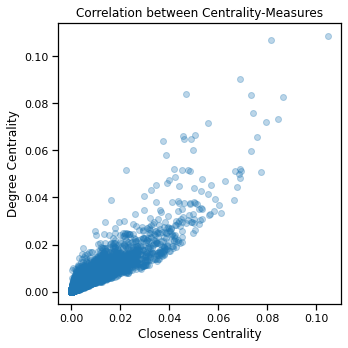

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(x=centrality_df['closeness'], 
            y=centrality_df['degree'],
           alpha=0.3)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_title("Correlation between Centrality-Measures")
ax.set_xlabel("Closeness Centrality")
ax.set_ylabel("Degree Centrality")
fig.tight_layout()

plt.show()

We also calculate the correlation between both measures. For this, the [`corr`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.corr.html) function is used. 

In [ ]:
centrality_df['closeness'].corr(centrality_df['degree'])

0.9182610715629449

## Subexercise 2.3.4 Clustering coefficient
Compute the average clustering coefficient for the PIN. Compare the result with
the values that you obtain for an ER network and a lattice network of same size
(i.e., number of nodes) and similar density.

In [ ]:
#G_er =      nx.generators.random_graphs.erdos_renyi_graph(Gcc.number_of_nodes(), p=0.001) # too much ram
G_er =      nx.generators.random_graphs.fast_gnp_random_graph(Gcc.number_of_nodes(), p=0.002) 
G_lattice = nx.generators.lattice.triangular_lattice_graph(m=165, n=400)

In [ ]:
print("Number of nodes for ER:", G_er.number_of_nodes())
print("Number of edges for ER:", G_er.number_of_edges())
print("Number of nodes for Lattice:", G_lattice.number_of_nodes())
print("Number of edges for Lattice:", G_lattice.number_of_edges())

Number of nodes for ER: 27269
Number of edges for ER: 743393
Number of nodes for Lattice: 33366
Number of edges for Lattice: 99365


In [ ]:
clusterings = [nx.average_clustering(G) for G in [Gcc, G_er, G_lattice]]
print("The Clustering Coefficient for the Human Network is", clusterings[0])
print("The Clustering Coefficient for the ER Network is", clusterings[1])
print("The Clustering Coefficient for the lattice Network is", clusterings[2])

The Clustering Coefficient for the Human Network is 0.10643123728372343
The Clustering Coefficient for the ER Network is 0.00199945115664579
The Clustering Coefficient for the lattice Network is 0.40255549561406706


# Exercise 2.4 Average path lengths
Next, we want to compute the average path lengths in the protein interaction network and compare it with ER and lattice networks. Fortunately, NETWORKX has
a function called `AVERAGE_SHORTEST_PATH_LENGTH` for this. Unfortunately, computing the shortest paths between all pairs of nodes is very slow for large networks. To speed up the computation, we will use a common trick: subsampling, which means that we do not compute the average path length over all pairs of nodes but rather just a random sample (e.g., 500 pairs of nodes). Write a function that does this and compute the approximate average shortest path lengths for ER, Lattice, and PIN. Discuss your findings.

In [ ]:
def sub_average_path(G, sample_size=1000):
  print("Start")
  nodes=np.array(G.nodes)
  # print(nodes)
  if nodes.ndim != 1: # is a lattice graph
    #random_indices = np.random.choice(nodes.shape[0], size=2, replace=False)
    #random_rows = nodes[random_indices, :]
    sub_G = nx.generators.lattice.triangular_lattice_graph(int(sample_size/10), n=10)
  else:
    random_rows = np.random.choice(G.nodes, sample_size)
    sub_G = G.subgraph(random_rows)
  sub_Gcc = sub_G.subgraph(max(nx.connected_components(sub_G), key=len))
  print("Number of nodes for Subgraph:", sub_G.number_of_nodes())
  print("Number of edges for Subgraph:", sub_G.number_of_edges())
  print("Number of edges for Subgraph_cc:", sub_Gcc.number_of_nodes())
  print("Number of edges for Subgraph_cc:", sub_Gcc.number_of_edges())
  res = nx.average_shortest_path_length(sub_Gcc)
  print("Average shortest Paths", nx.average_shortest_path_length(sub_Gcc))
  #([len(c) for c in nx.connected_components(sub_G)])
  #([len(c) for c in nx.connected_components(sub_Gcc)])
  return res


In [ ]:
averages=[0,0,0]
averages[0]=sub_average_path(Gcc)# for G in [#Gcc, G_er, 
averages[1]=sub_average_path(G_er)# for G in [#Gcc, G_er, 
averages[2]=sub_average_path(G_lattice)# for G in [#Gcc, G_er, 
                                        
print("The human network has an average shortest path length of", averages[0])
print("The ER network has an average shortest path length of",  averages[1])
print("The Lattice network has an average shortest path length of", averages[2])

Start
Number of nodes for Subgraph: 987
Number of edges for Subgraph: 814
Number of edges for Subgraph_cc: 464
Number of edges for Subgraph_cc: 810
Average shortest Paths 4.532090191405377
Start
Number of nodes for Subgraph: 981
Number of edges for Subgraph: 948
Number of edges for Subgraph_cc: 777
Number of edges for Subgraph_cc: 904
Average shortest Paths 9.828288155607742
Start
Number of nodes for Subgraph: 606
Number of edges for Subgraph: 1605
Number of edges for Subgraph_cc: 606
Number of edges for Subgraph_cc: 1605
Average shortest Paths 33.83207593486621
The human network has an average shortest path length of 4.532090191405377
The ER network has an average shortest path length of 9.828288155607742
The Lattice network has an average shortest path length of 33.83207593486621


We print in table-form for latex

In [ ]:
print("Network & Number of Nodes & Number of Edges & Clustering Coefficient & Average Path Length \\\\")
print("Human & {nodes} & {edges} & {cluster} & {paths} \\\\".format(nodes=Gcc.number_of_nodes(), edges=Gcc.number_of_edges(), cluster=clusterings[0], paths=averages[0]))
print("ER & {nodes} & {edges} & {cluster} & {paths} \\\\".format(nodes=G_er.number_of_nodes(), edges=G_er.number_of_edges(), cluster=clusterings[1], paths=averages[1]))
print("Lattice & {nodes} & {edges} & {cluster} & {paths}".format(nodes=G_lattice.number_of_nodes(), edges=G_lattice.number_of_edges(), cluster=clusterings[2], paths=averages[2]))

Network & Number of Nodes & Number of Edges & Clustering Coefficient & Average Path Length \\
Human & 27269 & 732760 & 0.10643123728372343 & 4.532090191405377 \\
ER & 27269 & 743393 & 0.00199945115664579 & 9.828288155607742 \\
Lattice & 33366 & 99365 & 0.40255549561406706 & 33.83207593486621


#Exercise 2.5 Small world network


Reproduce their findings from Fig. 2. For this, compute the characteristic path length L(p) and the clustering coefficient C(p) for the family of randomly rewired graphs described in their manuscript

In [ ]:
G_elegans = nx.from_pandas_edgelist(pd.read_csv('/content/BIOGRID-ORGANISM-Caenorhabditis_elegans-4.4.205.tab3.txt', sep='\t'),
                                   source='BioGRID ID Interactor A', target='BioGRID ID Interactor B')
print("Number of nodes:",G_elegans.number_of_nodes())
print("Number of edges:",G_elegans.number_of_edges())

Number of nodes: 8276
Number of edges: 35452


#Characterization of Network Structure

In [ ]:
#We transfor the network into the undirected version.
G_elegans = G_elegans.to_undirected()

In [ ]:

#Sometimes the node labels are not in the sequential order or labels are used. To facilitate our implementation, let us convert the labels to integers starting with the index zero, because Python uses 0-based indexing
G_elegans = nx.convert_node_labels_to_integers(G_elegans, first_label=0)

In [ ]:
#Since the degree() function from Networkx provides an iterator for (node, degree) , we will use only the values of the degree and ignore the label of the nodes. We also convert the list to a numpy array, since this structure is easier to be manipuled than other structures.
G_elegans_degree = dict(G_elegans.degree())
G_elegans_degree = list(G_elegans_degree.values())
print('Degree', G_elegans_degree)

Degree [4, 4, 140, 8, 13, 109, 73, 49, 45, 12, 3, 4, 32, 1, 2, 2, 3, 30, 17, 12, 6, 3, 1, 1, 9, 2, 2, 10, 22, 34, 7, 12, 17, 4, 1, 20, 7, 37, 3, 4, 59, 86, 17, 52, 6, 4, 130, 2, 4, 4, 69, 93, 18, 1, 5, 1, 7, 32, 42, 102, 102, 21, 10, 1, 4, 101, 4, 1, 3, 1, 20, 18, 18, 47, 14, 17, 32, 18, 64, 4, 7, 16, 3, 9, 3, 8, 25, 8, 22, 1, 14, 10, 24, 6, 2, 4, 97, 1, 17, 5, 13, 54, 8, 8, 49, 117, 9, 44, 8, 134, 2, 38, 6, 12, 100, 103, 18, 2, 1, 10, 46, 15, 2, 112, 13, 15, 28, 2, 6, 2, 21, 5, 23, 4, 6, 2, 13, 94, 1, 37, 14, 6, 2, 10, 6, 20, 2, 1, 1, 29, 1, 1, 1, 5, 10, 1, 2, 2, 1, 5, 1, 1, 3, 1, 2, 4, 14, 33, 1, 1, 3, 6, 46, 30, 5, 11, 74, 19, 4, 11, 43, 27, 4, 12, 37, 6, 28, 7, 18, 2, 7, 46, 6, 18, 3, 13, 9, 17, 23, 1, 31, 47, 14, 9, 3, 21, 96, 97, 1, 2, 8, 7, 17, 51, 2, 47, 21, 33, 27, 89, 6, 1, 2, 38, 95, 3, 13, 1, 115, 14, 10, 18, 45, 6, 69, 12, 1, 2, 2, 66, 20, 29, 20, 6, 7, 11, 20, 1, 5, 77, 2, 21, 26, 6, 6, 4, 91, 3, 11, 22, 9, 9, 1, 5, 3, 1, 11, 13, 9, 3, 21, 22, 3, 3, 20, 33, 8, 3, 11, 6, 1

In [ ]:
def sub_average_path_C(G_elegans, sample_size=100):
  sub_average_path_C = G_elegans.subgraph(np.random.choice(G_elegans.nodes, sample_size))

#Clustering coefficient C(p)

In [ ]:
nx.average_clustering(G_elegans)

0.11942253894153264

#Characteristic path length L(p)

In [ ]:
G_elegans = nx.Graph([(1, 2), (3, 4)])
for C in (G_elegans.subgraph(c).copy() for c in nx.connected_components(G_elegans)):
    print(nx.average_shortest_path_length(C))
    

1.0
1.0


#Exercise 2.6 Community detection in protein interaction networks

#Subexercise 2.6.1 Compute community structure

NETWORKX has a modularity-maximisation for community detection available. Use this to compute community structure in the PIN of Homo sapiens. Illustrate the distribution of the community sizes.

In [ ]:
inputname="BIOGRID-ORGANISM-Homo_sapiens-4.4.205.tab3.txt"
G_sapiens = nx.from_pandas_edgelist(pd.read_csv('/content/BIOGRID-ORGANISM-Homo_sapiens-4.4.205.tab3.txt', sep='\t'),
                            source='BioGRID ID Interactor A', target='BioGRID ID Interactor B')
print("Number of nodes:",G_sapiens.number_of_nodes())
print("Number of edges:",G_sapiens.number_of_edges())

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Number of nodes: 27274
Number of edges: 736015


In [ ]:
def sub_average_path_C(G_sapiens, sample_sapiens=100):
  sub_average_path_S = G_sapiens.subgraph(np.random.choice(G_sapiens.nodes, sample_size))

In [ ]:
import networkx.algorithms.community as nx_comm
G_sapiens = nx.barbell_graph(3, 0)
nx_comm.modularity(G_sapiens, [{0, 1, 2}, {3, 4, 5}])

0.35714285714285715

In [ ]:
import networkx.algorithms.community as nx_comm
G_sapiens = nx.barbell_graph(3, 0)
nx_comm.modularity(G_sapiens, [{0, 1, 2}, {3, 4, 5}])

0.35714285714285715

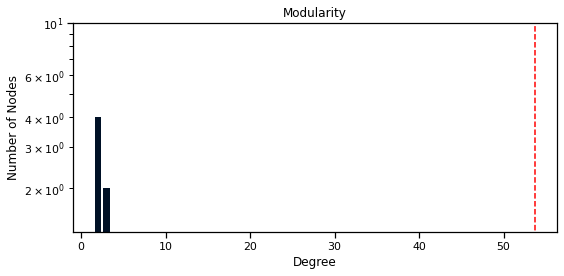

In [ ]:
degree_sequence = sorted([d for n, d in G_sapiens.degree()], reverse=True)
dmax = max(degree_sequence)
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(*np.unique(degree_sequence, return_counts=True),color='#001126')
ax.set_title("Modularity")
ax.set_xlabel("Degree")
ax.set_ylabel("Number of Nodes")
ax.set_yscale('log')
ax.vlines(meanDegree,0,10**4,linestyles='dashed',label='mean degree',color='r')
ax.set_ylim(top=10)

fig.tight_layout()

plt.show()